In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import math
import scipy.stats
import random 
import scipy
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#2d 
def graphFromEdgesFile (fname):
    G = nx.read_edgelist (fname, delimiter = '\t')
    print(len(G.nodes ()), len(G.edges ()))
    return G

# http://konect.uni-koblenz.de/networks/dolphins
Gd = graphFromEdgesFile ('../datasets/dolphins.tsv')

# http://konect.uni-koblenz.de/networks/arenas-jazz
Gj = graphFromEdgesFile ('../datasets/arenas-jazz.tsv')

62 159
198 2742


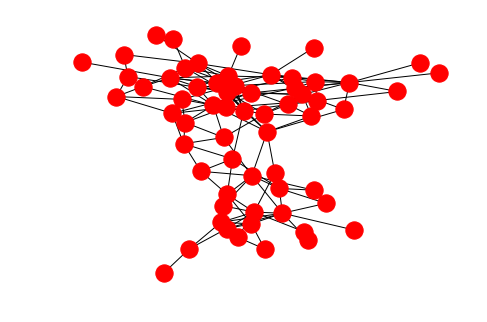

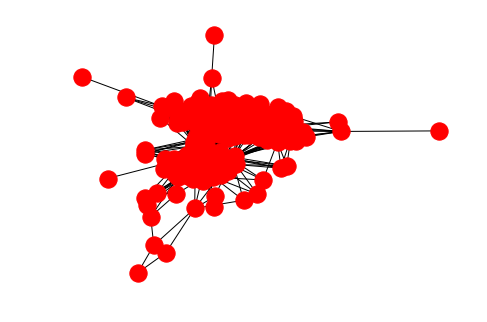

In [3]:
#2e 

def drawGraph (G, pos = None):
#     plt.figure (figsize=(15,15))
#     if not pos:
#         pos = nx.spring_layout(G)
    nx.draw(G)
#     nx.draw_networkx_labels(G) 
    plt.show()

drawGraph (Gd)
drawGraph (Gj)
    

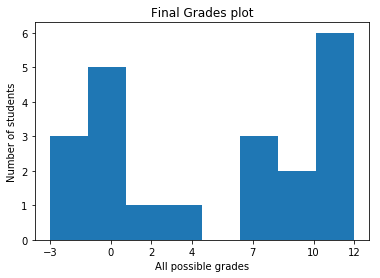

In [4]:
# 2f
import matplotlib.pyplot as plt
finalGrades = [-3, -3, 10, 2, 10, 0, 7, 7, 12, -3, 7, 0, 12, 12, 12 ,12, 12, 0, 0, 0, 4]
plt.hist(finalGrades, bins=8)
plt.xticks([-3, 0, 2, 4, 7, 10, 12])
plt.title("Final Grades plot")
plt.xlabel("All possible grades")
plt.ylabel("Number of students")
plt.show()

In [7]:
print(nx.degree(Gd).values())
plt.hist(list(Gd.degree().values()))
plt.show()

AttributeError: 'DegreeView' object has no attribute 'values'

In [8]:
nx.degree(Gj).values()
plt.hist(list(nx.degree(Gj).values()))
plt.show()

AttributeError: 'DegreeView' object has no attribute 'values'

mean


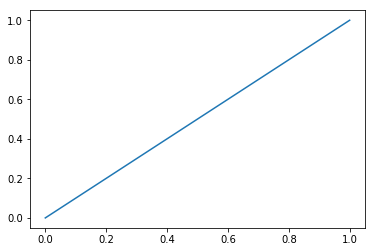

variance


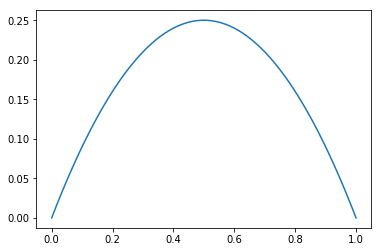

In [9]:
# ex.III.1

points = np.arange(0.0, 1.01, 0.01).tolist ()
means = []
variations = []
for p in points:
    mean, var = bernoulli.stats(p, moments='mv')
    means.append (mean)
    variations.append (var)

print('mean')
plt.plot (points, means)
plt.show ()
print ('variance')
plt.plot (points, variations)
plt.show ()

10 -0.033638568838916694


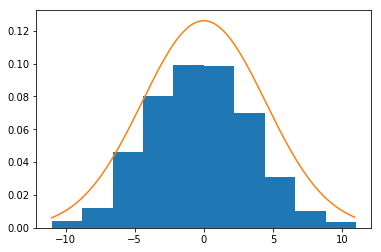

20 0.31747742475859475


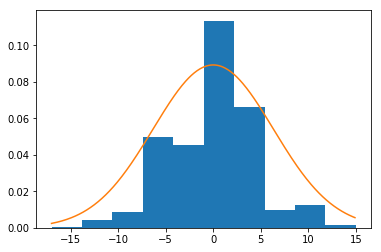

30 0.12143700663555146


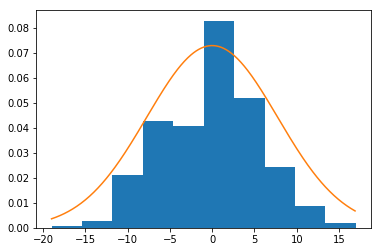

40 -0.08755323607469956


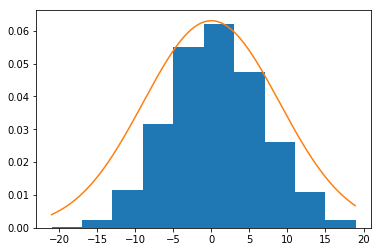

50 0.04193658936852929


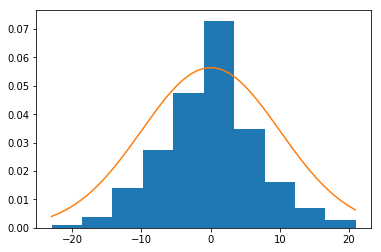

60 -0.07321476009089523


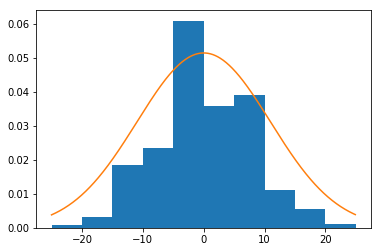

70 -0.11610501840510334


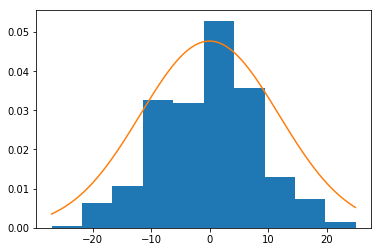

80 -0.08094160525318017


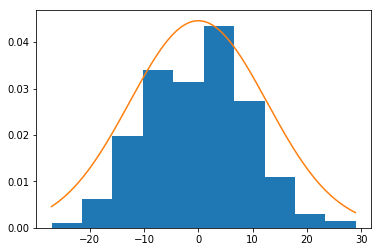

90 0.01760349506519976


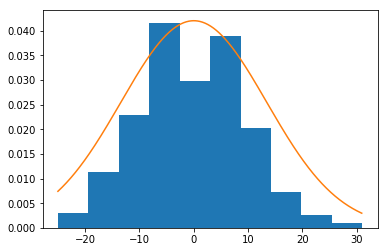

In [10]:
# ex.III.4

def eq45 (x, t):
    v = 0
    D = 1
    return math.exp (- 1.0 * (x-v*t)*(x-v*t) / 4 / t / D) / math.sqrt (2 * math.pi * t * D)
    

n_walkers = 1000

positions = [0] * n_walkers
#print positions

for t in range (100):
    for i in range (n_walkers):
        if random.randint(0,1) == 0:
            positions [i] += 1
        else:
            positions [i] -= 1
            
    if t % 10 == 0 and t > 0:
        #print t, scipy.stats.normaltest (positions)
        print (t, scipy.stats.kurtosis (positions))
        plt.hist (positions, normed = True)
        xs = np.arange (min(positions), max(positions), 0.1)
        ys = [eq45 (x, t) for x in xs]
        plt.plot (xs, ys)
        plt.show ()

In [11]:
# ex. III.7
def powerMethod (A):
    size = A.shape[0]
    x = np.ones (size)
    x /= np.linalg.norm (x)
    y = np.zeros (size)
    eps = 0.00001
    while np.linalg.norm (x - y) > eps:
        y = x
        x = A.dot (y)
        x /= np.linalg.norm(x)
        
    return np.linalg.norm (A.dot (y)) / np.linalg.norm (y)
    
A = np.diag (np.arange(3))
print(powerMethod (A))

1.99999999983


0
[1]


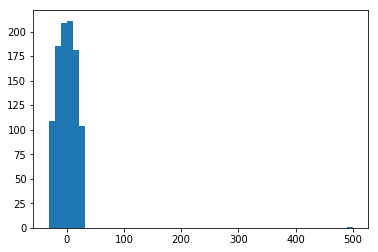

In [12]:
# ex. III.8

p = 0.5

n = 1000
A = np.zeros ((n,n))
for i in range (n):
    for j in range (i, n):
        v = bernoulli.rvs(p, size=1)[0]
        A[i,j] = v
        A[j,i] = v

v = bernoulli.rvs(p, size=1)[0]
print( v)
v = bernoulli.rvs(p, size=1)
print( v)

eig = np.linalg.eigvals (A)
plt.hist (eig, bins = 50)
plt.show ()